In [1]:
%run "wavelet_denoising.py"
%matplotlib inline


Processing GAUSSIAN noise...
 Saved metrics: metrics_wavelet_comparison_gaussian.csv

Processing SPECKLE noise...
 Saved metrics: metrics_wavelet_comparison_speckle.csv

Processing SALTPEPPER noise...
 Saved metrics: metrics_wavelet_comparison_saltpepper.csv

 All noise-type metrics successfully saved to the 'results' folder.


In [2]:
%run "comparision.py"

 Saved Table: Table_Best_gaussian.csv
 Saved Table: Table_Best_speckle.csv
 Saved Table: Table_Best_saltpepper.csv



=== WAVELET-ONLY BEST METHODS (PER DATASET & NOISE TYPE) ===
Noise_Type   Dataset Wavelet Mode      PSNR     SSIM      MSE
  Gaussian histology   coif2 hard 46.764993 0.998781 0.000021
  Gaussian  products     db7 hard 42.788290 0.993534 0.000053
  Gaussian radiology     db4 hard 40.820884 0.952786 0.000083
Saltpepper histology     db7 soft 27.826767 0.746207 0.001649
Saltpepper  products     db7 soft 27.286107 0.646813 0.001868
Saltpepper radiology     db7 soft 29.413624 0.589392 0.001145
   Speckle histology   coif2 soft 30.650652 0.887782 0.000861
   Speckle  products   coif2 soft 27.679473 0.767896 0.001706
   Speckle radiology    sym4 soft 29.393047 0.666642 0.001150

=== TRANSPOSED TABLES (IEEE Two-Column Friendly Format) ===

Table — Gaussian Noise (Transposed)
Dataset  histology  products  radiology
PSNR     46.764993 42.788290  40.820884
SSIM      0.998781  0.993534   0.952786
MSE       0.000021  0.000053   0.000083

Table — Saltpepper Noise (Transposed)
Dataset  histology  p

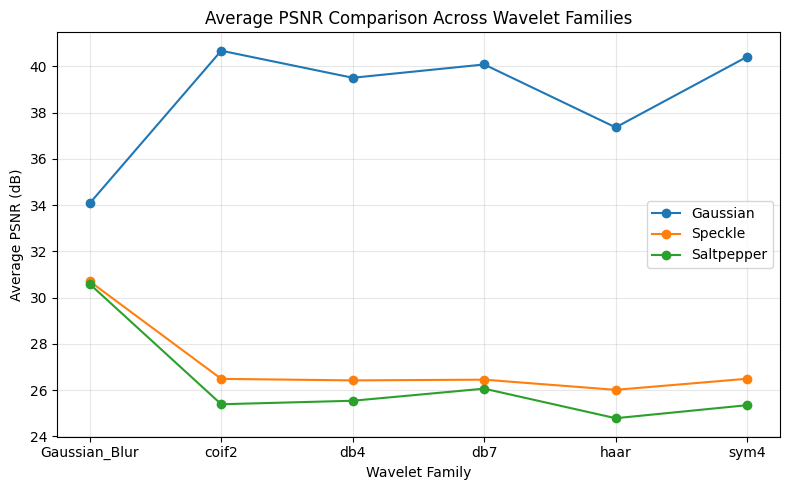


Analysis complete. Wavelet-only summaries and visualization generated successfully.


<Figure size 640x480 with 0 Axes>

In [3]:
%run "analyze_results.py"

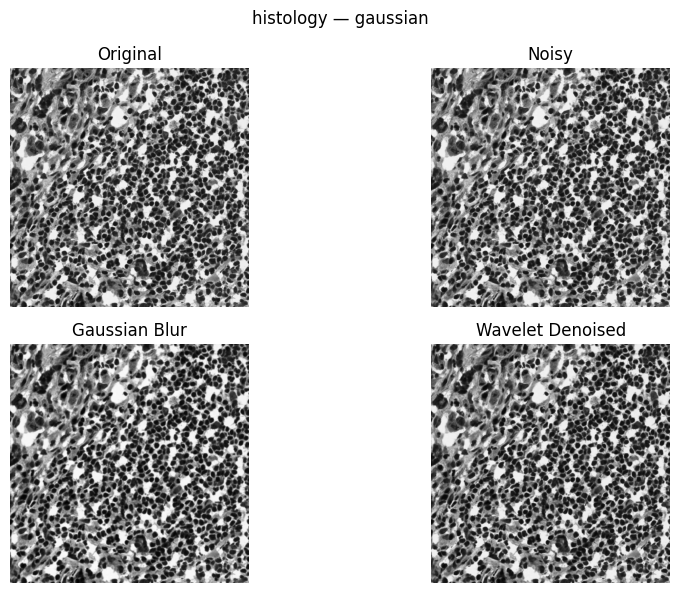

In [5]:
# ==============================================================
# Example visualization using one real image from dataset
# ==============================================================

import os

# Choose example
dataset = "histology"
noise_type = "gaussian"
file = os.listdir(os.path.join(clean_base, dataset))[0]

clean_path = os.path.join(clean_base, dataset, file)
noisy_path = os.path.join(noisy_base, f"{noise_type}_noise", file)
blur_path  = os.path.join(denoised_base, f"{noise_type}_blur", file)

# Load images
sample_clean = load_gray(clean_path)
sample_noisy = load_gray(noisy_path)
sample_gaussian = load_gray(blur_path)

# Load best wavelet result (example: db4 soft — you can change)
wavelet_example = "db4"
mode_example = "soft"
wavelet_path = os.path.join(
    denoised_base,
    f"{noise_type}_wavelets",
    wavelet_example,
    f"{wavelet_example}_{mode_example}_{file}"
)

sample_wavelet = load_gray(wavelet_path)

# Visualize
visualize_denoising(
    sample_clean,
    sample_noisy,
    sample_gaussian,
    sample_wavelet,
    title=f"{dataset} — {noise_type}"
)


In [6]:
plt.savefig(os.path.join(results_dir, f"visual_{dataset}_{noise_type}.png"), dpi=200)

<Figure size 640x480 with 0 Axes>

In [7]:
print("\nBest wavelet per dataset:")
print(best_wavelet[["Dataset", "Wavelet", "Mode"]])


Best wavelet per dataset:
     Dataset Wavelet  Mode
0  histology   coif2  hard
1   products     db7  hard
2  radiology     db4  hard
3  histology     db7  soft
4   products     db7  soft
5  radiology     db7  soft
6  histology   coif2  soft
7   products   coif2  soft
8  radiology    sym4  soft
